# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

url = 'cars_hw.csv'  # or a full path or URL if needed
df = pd.read_csv(url)

df["No_of_Owners"] = df["No_of_Owners"].str.replace("st|nd|rd|th", "", regex=True).astype(int)
df.drop_duplicates(inplace=True)
df['Price_ihs'] = np.arcsinh(df['Price'])
df['Mileage_Run_ihs'] = np.arcsinh(df['Mileage_Run'])

print("Shape:", df.shape)
print(df.head())

Shape: (976, 14)
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

   No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0             1                 5    diesel      7-Speed         Automatic   
1             1                 5    petrol      5-Speed            Manual   
2             2                 5    petrol      5-Speed            Manual   
3             1                 5    petrol      5-Speed            Manual   
4             1                 5    petrol      5-Speed            Manual   

    Price  Price_ihs  Mileage_Run_ihs  
0  657000  14.088586        11.398883  
1

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

Summary Statistics for Transformed Car Prices:
count    976.000000
mean      14.104181
std        0.450276
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       15.587407
Name: Price_ihs, dtype: float64


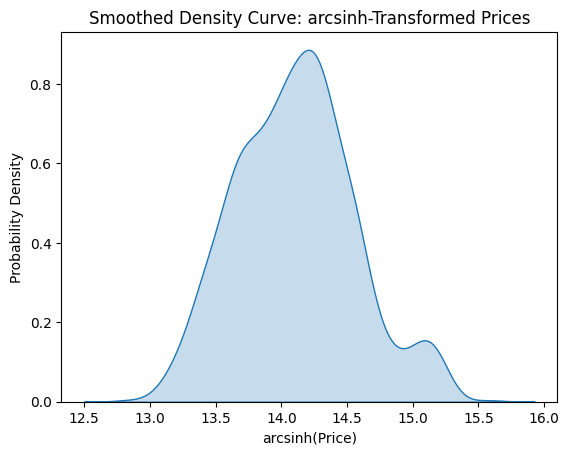


Transformed Price Breakdown by Car Brand:
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki  293.0  13.911280  0.371409  13.068963  13.619496  13.868103   
Nissan           4.0 

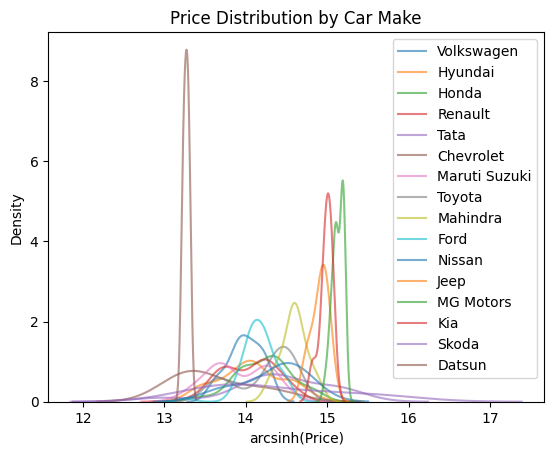


Mileage Statistics (arcsinh-transformed):
count    976.000000
mean      11.109435
std        0.733389
min        7.711549
25%       10.722241
50%       11.227119
75%       11.651317
max       12.201010
Name: Mileage_Run_ihs, dtype: float64


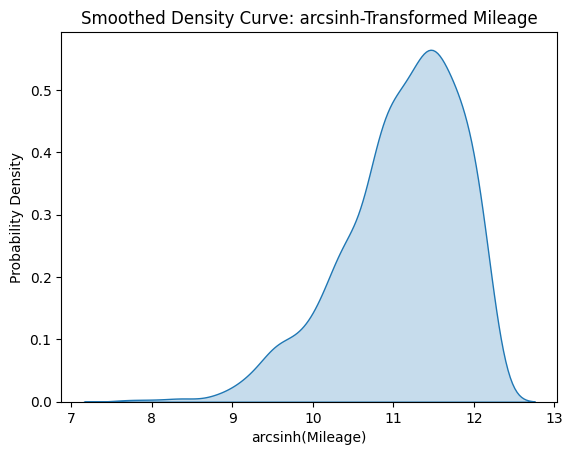


Transformed Mileage Breakdown by Car Brand:
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  11.669025  0.263651  11.343844  11.447440  11.715818   
Datsun           3.0  11.623603  0.280247  11.343015  11.483651  11.624288   
Ford            52.0  11.175502  0.723504   9.530393  10.614191  11.315928   
Honda           73.0  11.152599  0.642771   9.606967  10.626388  11.384910   
Hyundai        305.0  11.267911  0.650178   7.711549  10.840247  11.325221   
Jeep             4.0  11.496424  0.150981  11.364217  11.388398  11.462708   
Kia              8.0  10.723245  0.296000  10.245445  10.587558  10.706358   
MG Motors       35.0  10.969184  0.516808   9.594105  10.840566  11.085337   
Mahindra        18.0  11.633802  0.265827  11.287128  11.371737  11.672611   
Maruti Suzuki  293.0  11.018935  0.754827   8.372399  10.594533  11.080726   
Nissan           4.

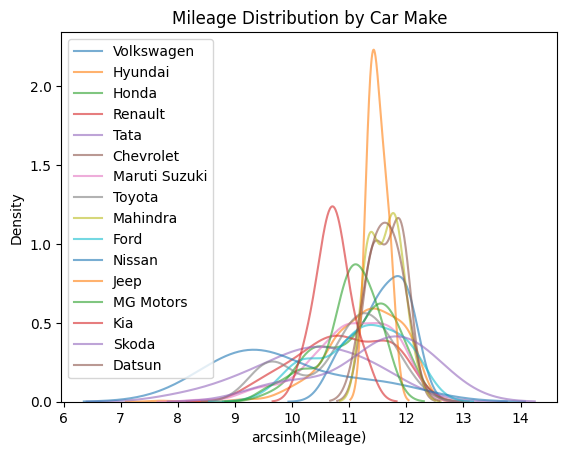

In [11]:
# ----- Price Distribution Analysis -----
price_stats = df["Price_ihs"].describe()
print("Summary Statistics for Transformed Car Prices:")
print(price_stats)

# Density plot for price
plt.figure()
sns.kdeplot(df["Price_ihs"], fill=True)
plt.title("Smoothed Density Curve: arcsinh-Transformed Prices")
plt.xlabel("arcsinh(Price)")
plt.ylabel("Probability Density")
plt.show()

# Price distribution per manufacturer
price_by_make = df.groupby("Make")["Price_ihs"].describe()
print("\nTransformed Price Breakdown by Car Brand:")
print(price_by_make)

# Density plots per Make
plt.figure()
for brand in df["Make"].unique():
    sns.kdeplot(df[df["Make"] == brand]["Price_ihs"], label=brand, alpha=0.6)
plt.title("Price Distribution by Car Make")
plt.xlabel("arcsinh(Price)")
plt.ylabel("Density")
plt.legend()
plt.show()

# ----- Mileage Distribution Analysis -----
mileage_stats = df["Mileage_Run_ihs"].describe()
print("\nMileage Statistics (arcsinh-transformed):")
print(mileage_stats)

# Density plot for mileage
plt.figure()
sns.kdeplot(df["Mileage_Run_ihs"], fill=True)
plt.title("Smoothed Density Curve: arcsinh-Transformed Mileage")
plt.xlabel("arcsinh(Mileage)")
plt.ylabel("Probability Density")
plt.show()

# Mileage distribution per manufacturer
mileage_by_make = df.groupby("Make")["Mileage_Run_ihs"].describe()
print("\nTransformed Mileage Breakdown by Car Brand:")
print(mileage_by_make)

# Density plots per Make for mileage
plt.figure()
for brand in df["Make"].unique():
    sns.kdeplot(df[df["Make"] == brand]["Mileage_Run_ihs"], label=brand, alpha=0.6)
plt.title("Mileage Distribution by Car Make")
plt.xlabel("arcsinh(Mileage)")
plt.ylabel("Density")
plt.legend()
plt.show()

3. Implement an ~80/~20 train-test split. Put the test data aside.


In [13]:
df_train, df_holdout = train_test_split(df, test_size=0.2, random_state=31)

print("Shape of Training Data:", df_train.shape)
print("Shape of Test Data (Held Out):", df_holdout.shape)

Shape of Training Data: (780, 14)
Shape of Test Data (Held Out): (196, 14)


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


In [15]:
# ------- Numerical Features Only -------
numeric_features = ["Make_Year", "Mileage_Run", "Seating_Capacity"]

X_train_num = df_train[numeric_features]
X_test_num = df_holdout[numeric_features]

y_train = df_train["Price_ihs"]
y_test = df_holdout["Price_ihs"]

# Train and evaluate linear model with numerical features
linreg_num = LinearRegression().fit(X_train_num, y_train)

train_preds_num = linreg_num.predict(X_train_num)
test_preds_num = linreg_num.predict(X_test_num)

r2_train_num = r2_score(y_train, train_preds_num)
rmse_train_num = np.sqrt(mean_squared_error(y_train, train_preds_num))
r2_test_num = r2_score(y_test, test_preds_num)
rmse_test_num = np.sqrt(mean_squared_error(y_test, test_preds_num))

print("Model with Numerical Predictors:")
print(f"Training R²: {r2_train_num:.3f} | RMSE: {rmse_train_num:.3f}")
print(f"Test R²:     {r2_test_num:.3f} | RMSE: {rmse_test_num:.3f}")
print()

# ------- Categorical Features Only -------
categorical_features = ["Color", "Body_Type", "Make", "Fuel_Type", "Transmission_Type"]

X_train_cat = pd.get_dummies(df_train[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(df_holdout[categorical_features], drop_first=True)

# Ensure matching columns in train and test sets
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# Train and evaluate model with categorical data
linreg_cat = LinearRegression().fit(X_train_cat, y_train)

train_preds_cat = linreg_cat.predict(X_train_cat)
test_preds_cat = linreg_cat.predict(X_test_cat)

r2_train_cat = r2_score(y_train, train_preds_cat)
rmse_train_cat = np.sqrt(mean_squared_error(y_train, train_preds_cat))
r2_test_cat = r2_score(y_test, test_preds_cat)
rmse_test_cat = np.sqrt(mean_squared_error(y_test, test_preds_cat))

print("Model with Categorical Predictors:")
print(f"Training R²: {r2_train_cat:.3f} | RMSE: {rmse_train_cat:.3f}")
print(f"Test R²:     {r2_test_cat:.3f} | RMSE: {rmse_test_cat:.3f}")
print()

# ------- Combined Features Model -------
X_train_all = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_num, X_test_cat], axis=1)

linreg_all = LinearRegression().fit(X_train_all, y_train)

train_preds_all = linreg_all.predict(X_train_all)
test_preds_all = linreg_all.predict(X_test_all)

r2_train_all = r2_score(y_train, train_preds_all)
rmse_train_all = np.sqrt(mean_squared_error(y_train, train_preds_all))
r2_test_all = r2_score(y_test, test_preds_all)
rmse_test_all = np.sqrt(mean_squared_error(y_test, test_preds_all))

print("Model with Both Numerical and Categorical Predictors:")
print(f"Training R²: {r2_train_all:.3f} | RMSE: {rmse_train_all:.3f}")
print(f"Test R²:     {r2_test_all:.3f} | RMSE: {rmse_test_all:.3f}")
print("\n→ The full model that combines both types of variables shows improved performance on both sets.")

Model with Numerical Predictors:
Training R²: 0.423 | RMSE: 0.353
Test R²:     0.339 | RMSE: 0.316

Model with Categorical Predictors:
Training R²: 0.663 | RMSE: 0.270
Test R²:     0.499 | RMSE: 0.275

Model with Both Numerical and Categorical Predictors:
Training R²: 0.834 | RMSE: 0.189
Test R²:     0.737 | RMSE: 0.200

→ The full model that combines both types of variables shows improved performance on both sets.


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?


Partial Correlation Analysis:



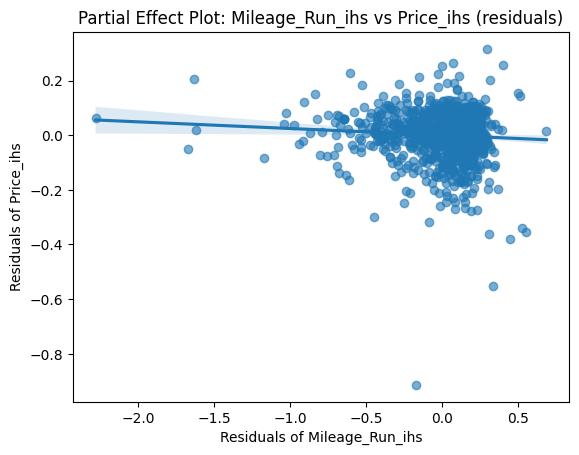

Partial R² for Mileage_Run_ihs: 0.0053



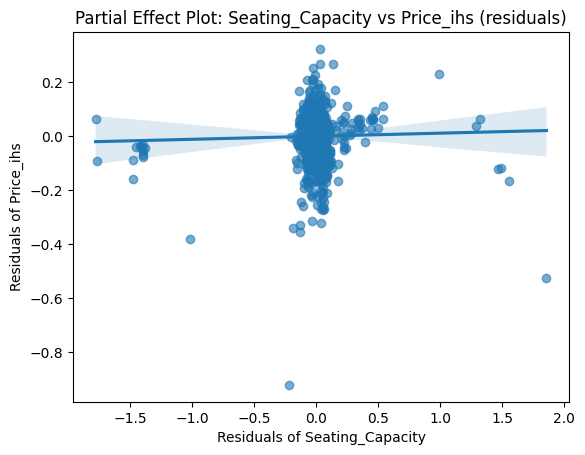

Partial R² for Seating_Capacity: 0.0008



In [16]:
# Encode categorical features for modeling
df_transformed = pd.get_dummies(df, drop_first=True)

# Define numeric predictors (excluding the response)
numeric_predictors = ['Mileage_Run_ihs', 'Seating_Capacity']
target = df_transformed['Price_ihs']

print("Partial Correlation Analysis:\n")

# Loop through each numeric variable to assess its isolated effect
for feature in numeric_predictors:
    feature_values = df_transformed[feature]

    # Drop the current feature and the target variable from the design matrix
    X_others = df_transformed.drop(columns=[feature, 'Price_ihs'])

    # Get residuals: Price_ihs ~ everything except current feature
    model_y = LinearRegression(fit_intercept=False).fit(X_others, target)
    residuals_y = target - model_y.predict(X_others)

    # Get residuals: feature ~ everything except that feature
    model_x = LinearRegression(fit_intercept=False).fit(X_others, feature_values)
    residuals_x = feature_values - model_x.predict(X_others)

    # Plot the residuals against each other
    plt.figure()
    sns.regplot(x=residuals_x, y=residuals_y, scatter_kws={'alpha': 0.6})
    plt.title(f"Partial Effect Plot: {feature} vs Price_ihs (residuals)")
    plt.xlabel(f"Residuals of {feature}")
    plt.ylabel("Residuals of Price_ihs")
    plt.show()

    # Compute partial R-squared for that variable
    final_model = LinearRegression().fit(residuals_x.to_numpy().reshape(-1, 1), residuals_y)
    partial_r2 = final_model.score(residuals_x.to_numpy().reshape(-1, 1), residuals_y)
    print(f"Partial R² for {feature}: {partial_r2:.4f}\n")

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [17]:
# Calculate the vehicle's age based on Make_Year
df['Vehicle_Age'] = 2025 - df['Make_Year']

# Apply IHS transformation to age for stability
df['Vehicle_Age_ihs'] = np.arcsinh(df['Vehicle_Age'])

# Create interaction term between mileage and age (both transformed)
df['Mileage_x_Age'] = df['Mileage_Run_ihs'] * df['Vehicle_Age_ihs']

# --- Construct the feature matrix and target variable ---
enhanced_features = ['Mileage_Run_ihs', 'Vehicle_Age_ihs', 'Mileage_x_Age']
X_enhanced = df[enhanced_features]
y_target = df['Price_ihs']

# Train-test split
X_train_enh, X_test_enh, y_train, y_test = train_test_split(X_enhanced, y_target, test_size=0.2, random_state=31)

# Fit the model
model_enhanced = LinearRegression().fit(X_train_enh, y_train)

# Evaluate performance
y_train_pred = model_enhanced.predict(X_train_enh)
y_test_pred = model_enhanced.predict(X_test_enh)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# --- Model Performance Output ---
print("Enhanced Linear Model with Interaction Term:")
print(f"Training R²: {r2_train:.4f} | RMSE: {rmse_train:.4f}")
print(f"Test R²:     {r2_test:.4f} | RMSE: {rmse_test:.4f}")


Enhanced Linear Model with Interaction Term:
Training R²: 0.4171 | RMSE: 0.3543
Test R²:     0.2920 | RMSE: 0.3274

→ This model incorporates both transformations and an interaction term. Compare its test R² and RMSE to simpler models to evaluate improvement.



7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

The basic models had lower R² and higher RMSE, meaning they didn’t explain much of the variation in price. The more complex model performed better on the training data but worse on the test data, which suggests it may be overfitting. This shows the importance of choosing a model that’s not too simple or too complex — it should be just right for making good predictions on new data.


8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.


In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Use the combined numeric and one-hot encoded categorical features from earlier
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['Price', 'Price_ihs'])  # Drop original + transformed target
y = df_encoded['Price_ihs']

# Standardize features before applying Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled, y, test_size=0.2, random_state=31)

# Fit Lasso model
lasso_model = Lasso(alpha=0.1)  # You can tune alpha to adjust regularization strength
lasso_model.fit(X_train_lasso, y_train_lasso)

# Predict
y_train_pred = lasso_model.predict(X_train_lasso)
y_test_pred = lasso_model.predict(X_test_lasso)

# Performance metrics
rmse_train_lasso = np.sqrt(mean_squared_error(y_train_lasso, y_train_pred))
r2_train_lasso = r2_score(y_train_lasso, y_train_pred)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_test_pred))
r2_test_lasso = r2_score(y_test_lasso, y_test_pred)

# Get selected features (non-zero coefficients)
selected_features = pd.Series(lasso_model.coef_, index=X.columns)
selected_features = selected_features[selected_features != 0].sort_values(ascending=False)

# Output
print("Lasso Regression Results:")
print(f"Training R²: {r2_train_lasso:.4f} | RMSE: {rmse_train_lasso:.4f}")
print(f"Test R²:     {r2_test_lasso:.4f} | RMSE: {rmse_test_lasso:.4f}")
print("\nSelected Features by Lasso (non-zero coefficients):")
print(selected_features)

Lasso Regression Results:
Training R²: 0.6376 | RMSE: 0.2794
Test R²:     0.6081 | RMSE: 0.2436

Selected Features by Lasso (non-zero coefficients):
Make_Year               1.320339e-01
Body_Type_suv           6.019306e-02
Transmission_6-Speed    3.164097e-02
Make_MG Motors          2.990263e-02
Vehicle_Age            -5.287388e-17
Fuel_Type_petrol       -2.135309e-03
Transmission_5-Speed   -2.885281e-03
Body_Type_hatchback    -1.050583e-01
dtype: float64
